# Изучение закономерностей, определяющих успешность игр

**Заказчик**

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

**Цель проекта**

Нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Входные данные**

Из открытых источников доступны исторические данные за 2016 год о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), а именно:
•	Name — название игры;\
•	Platform — платформа;\
•	Year_of_Release — год выпуска;\
•	Genre — жанр игры;\
•	NA_sales — продажи в Северной Америке (миллионы проданных копий);\
•	EU_sales — продажи в Европе (миллионы проданных копий);\
•	JP_sales — продажи в Японии (миллионы проданных копий);\
•	Other_sales — продажи в других странах (миллионы проданных копий);\
•	Critic_Score — оценка критиков (максимум 100);\
•	User_Score — оценка пользователей (максимум 10);\
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход исследования**

Исследование пройдёт в несколько этапов:\
. обзор данных;\
. предобработка данных;\
. исследовательский анализ данных;\
. составление портрета пользователя каждого региона;\
. проверка гипотез.

In [1]:
# импортируем библиотеки
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

#### Шаг 1. Откроем файл с данными и изучим общую информацию**

In [2]:
# cчитаваем данные из csv-файла в датафрейм и сохраним в переменную
games = pd.read_csv('C:/Users/nata/Downloads/games.csv')

In [3]:
# выведем таблицу с помощью функции display
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# выведем основную информацию о датафрейме с помощью метода info()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# выведем количество строк-дубликатов в данных
games.duplicated().sum()

0

**Промежуточные итоги:** \
После изучения общей информации о данных выяснили:\
. данные представлены одной таблицей;\
. не все данные заполнены (в столбцах есть пропущенные значения);\
. у части данных некорретный тип данных;\
. строк-дубликатов не обнаружено.

#### Шаг 2. Подготовим данные

**2.1. Заменим названия столбцов** 

In [6]:
# приведем к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2. Обработаем пропуски** 

In [7]:
# зафиксируем какое количество строк было изначально
row_games = games.shape[0] 

In [8]:
# удалим строки с пропусками в столбце 'name', 'year_of_release', 'genre'
games = games.dropna(subset=['name', 'year_of_release', 'genre'])

In [9]:
# выведем перечень уникальных значений в столбце 'critic_score' - оценка критиков (максимум 100)
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [10]:
# выведем перечень уникальных значений в столбце 'critic_score' -  оценка пользователей (максимум 10)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# заменим значение 'tbd' в столбце 'critic_score' на пропуск
# так как 'tbd' используется, если какая-то информация еще не определена или решение по вопросу не принято
games['user_score'] = games['user_score'].replace('tbd', np.NaN, regex=True)

In [12]:
# выведем перечень уникальных значений в столбце 'rating' -  pейтинг от организации ESRB 
games['rating'].unique()           

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
# заменим пропущенные значения в столбце 'rating' на значение - нет рейтинга
games['rating']= games['rating'].fillna('unrated')

In [14]:
# проверим какое количество данных мы отбросили (1,6% - это допустимо и не исказит наше исследование)
print(1 - games.shape[0]/row_games)

0.016212982351181626


**Промежуточные выводы:** \    
Возможными причинами появления пропусков в исходных данных могут быть:
    
. неслучайные (просто в принципе нет этой информации - это характерно для игр из далекого прошлого (речь об отзывах, рейтингах) + не все создатели текущих игр получают рейтинговую оценку ESRB);
    
. случайные (человек не внимательно вносил/переносил данные);
    
. полностью случайные (системные ошибки, сам процесс выгрузки «испортил» данные).
</div>

**2.3. Преобразуем типы данных**

In [15]:
# преобразуем тип данных столбца 'year_of_release' на целочисленный 
games['year_of_release'] = games['year_of_release'].astype('int')  

In [16]:
# преобразуем тип данных столбца 'user_score' на вещественный 
games['user_score'] = games['user_score'].astype('float')

**2.4. Посчитаем суммарные продажи во всех регионах**

In [17]:
# запишем в отдельный столбец
# games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [18]:
# выведем получившуюся таблицу
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unrated,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unrated,0.01


**Промежуточные итоги:** \
. отредактировали названия столбцов;\
. отбросили часть данных, в которых были пропуски по столбцам 'name', 'year_of_release', 'genre'(это 1,6% от всего объема данных);\
. обработали пропущенные значения в столбцах 'user_score', 'rating';\
. преобразовали тип данных у столбцов 'year_of_release', 'user_score' на более удобные типы;\
. добавили еще один "признак" - посчитали для каждой игры суммарные продажи во всех регионах.

#### Шаг 3. Проведем исследовательский анализ данных

**3.1. Посмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

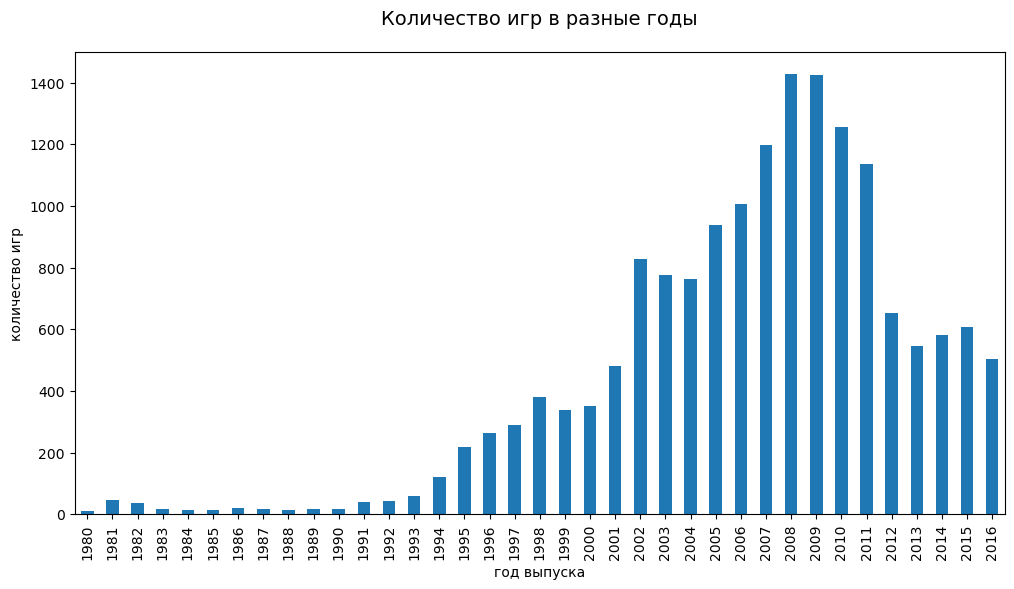

In [19]:
# для каждого года посчитаем количество выпущенных игр
games.groupby('year_of_release')['name'].agg('count').plot(kind='bar', figsize=(12,6))
plt.title("Количество игр в разные годы", fontsize=14, pad=20)
plt.xlabel("год выпуска")
plt.ylabel("количество игр")
plt.show()

**Промежуточные итоги:** \
Важны ли данные за все периоды? Нет, для планирования и прогнозирования будущего все периоды не нужны. Почему? На появление новых игр влияло множество факторов. Это и доступность персональных компьютеров, и развитием языков программирования, и развитие 3D-графики, и Интернета. Как это было по годам:\
. с 1980-1993 на рынке представлено мало игр - не каждому были по карману персональные компьютеры;\
. с 1993-2009 выпускалось больше игр (это годы инновации в компьютерных играх: графика, новые жанры);\
. с 2009-2016 выпускается меньше игр (это сказываются высокие требования к исполнению игр, разработчикам на создание игр необходимо гораздо больше времени).

**3.2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [20]:
# создадим сводную таблицу с данными по платформах и их продажами за весь период существования
games_pivot_table = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

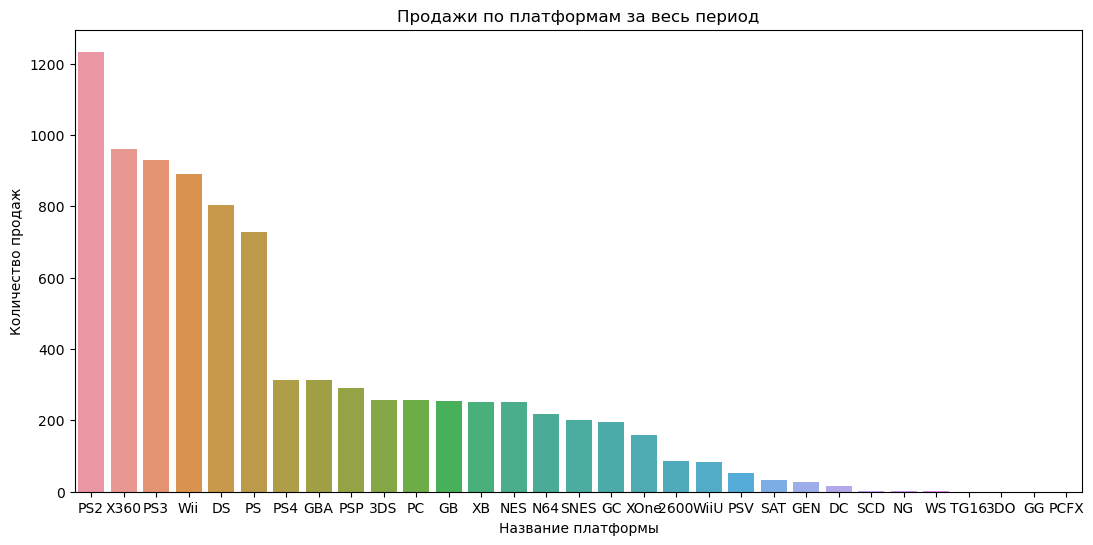

In [21]:
# построим столбиковую диаграмму
plt.figure(figsize=(13,6))
sns.barplot(x=games_pivot_table.index, y=games_pivot_table['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

In [22]:
# сохраним и выведем в переменную топ-5 платформ с наибольшими суммарными продажами
games_top5_total_sales = games.query('(platform == ["PS2", "X360", "PS3", "Wii", "DS"]) & (year_of_release >= 1999)')

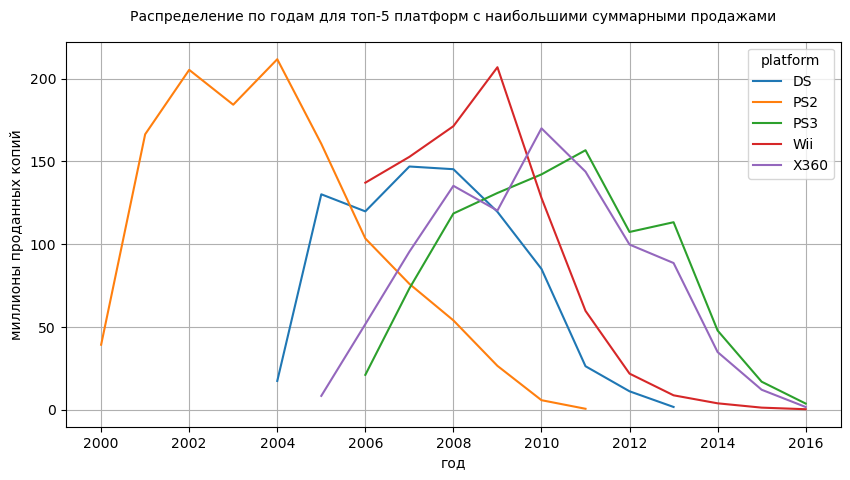

In [23]:
# построим распределение по годам для платформ с наибольшими суммарными продажами (топ-5)
(games_top5_total_sales
 .pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc = 'sum')
 .plot(grid=True, figsize=(10, 5)))
plt.title("Распределение по годам для топ-5 платформ с наибольшими суммарными продажами", fontsize=10, pad=15)
plt.xlabel("год")
plt.ylabel("миллионы проданных копий")
plt.show()

**Промежуточные выводы:** \
За какой характерный срок появляются новые и исчезают старые платформы?\
Цикл появления новых и исчезновения старых платформ составляет несколько лет. При этом пик популярности каждой платформы приходится в среднем на период м/у четвертым и шестым годами существования этой платформы (т.е. платформы, продажи у которых растут до этого срока могут считаться перспективными). 

**3.3. Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывая в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [24]:
# выведем платформы с наибольшими суммарными продажами за актуальный период (это последние пару лет)
(games
 .query('year_of_release >= 2015')
 .groupby('platform')['total_sales'].agg('sum')
 .reset_index().sort_values(by='total_sales', ascending=False).head(10))

,platform,total_sales
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


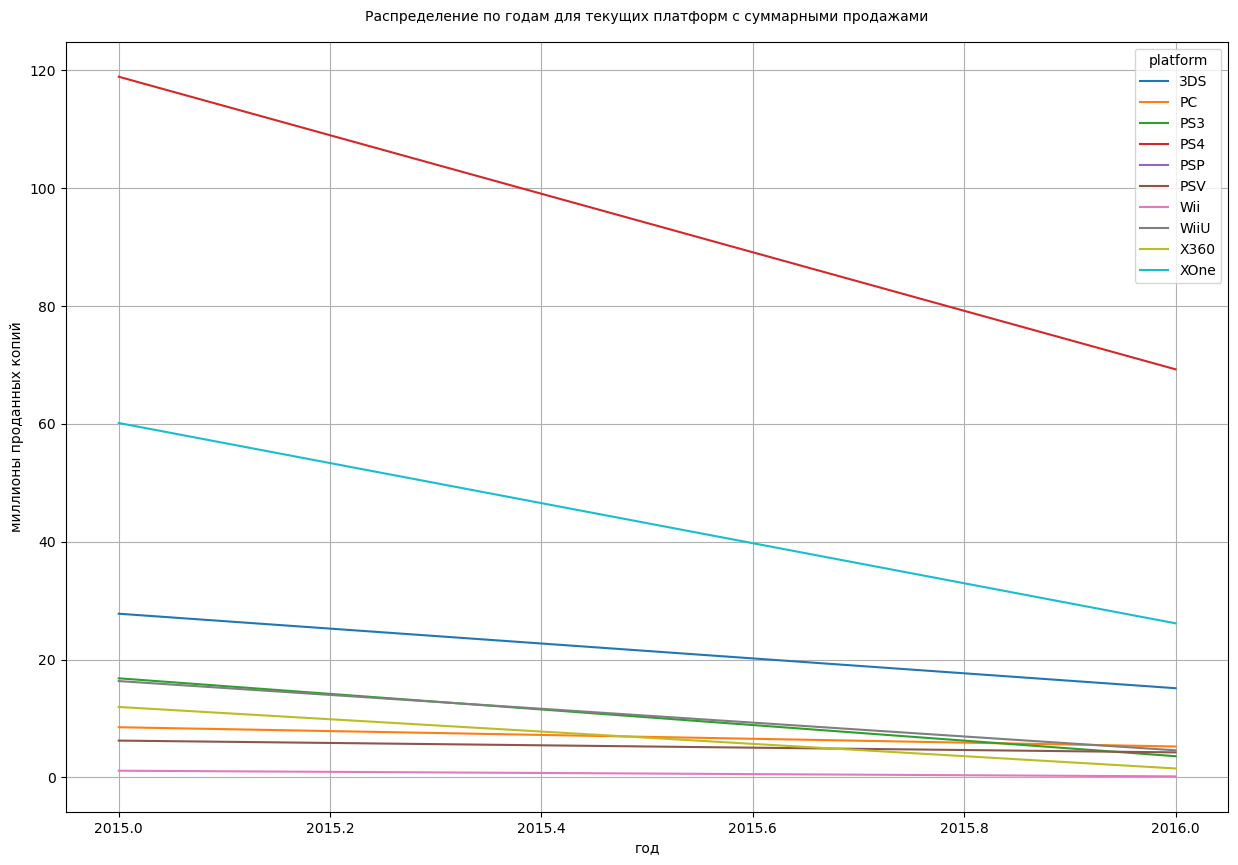

In [25]:
# построим распределение за актуальный период для платформ с суммарными продажами 
(games
 .query('year_of_release >= 2015')
 .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(15, 10)))
plt.title("Распределение по годам для текущих платформ с суммарными продажами", fontsize=10, pad=15)
plt.xlabel("год")
plt.ylabel("миллионы проданных копий")
plt.show()

**Промежуточные выводы:** \
Мы рассмотрели данные за актуальный период.
Прогноз на 2017 год таков:\
. потенциально прибыльными платформами являются PS4,XOne и 3DS;\
. еще будут актуальны игры для платформ PS3, WiiU и PC;\
. остальные платформы уже упали в продажах и ждать роста их продаж в 2017 году не стоит.

**3.4. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам (не учитывая в работе данные за предыдущие годы). Опишем результат.**

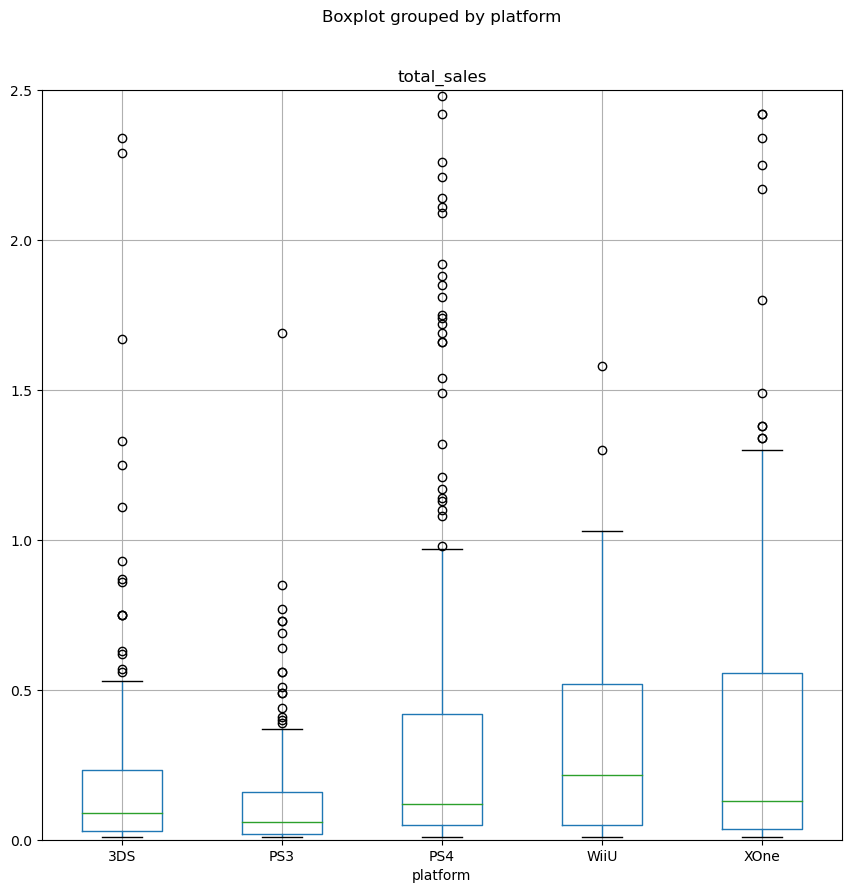

In [26]:
# построим общую диаграмму размаха в разбивке по актуальным платформам
games_query = games.query('(year_of_release >= 2015) & (platform == ["PS4", "XOne", "3DS", "PS3", "WiiU"])')

games_query.boxplot(column='total_sales', by='platform', figsize=(10, 10)).set_ylim(0, 2.5)
plt.show()

**Промежуточные выводы:** \
Итоги:\
. медиана у всех платформ на разных значениях - это говорит о том, средняя выручка от продажи разных игр у всех платформ разная. И большенство платформ не смогли заработать на большенстве игр более 500 тыс. долларов за актуальный период;\
. но есть явные лидеры (это WiiU и XOne). У этих платформ более популярные и продаваемые игры, чем у остальных и приносящие больше прибыли.

**3.5. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

In [27]:
# рассмотрим PS4 (в 2016 г. эта платформа на пике популярности)
# сохраним в отдельную переменную данные по PS4 по нескольким столбцам
PS4_ratings = (games
       .query('platform =="PS4"')
       .loc[:,['total_sales', 'critic_score', 'user_score']])

In [28]:
# посчитаем корреляцию между отзывами и продажами
PS4_ratings.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


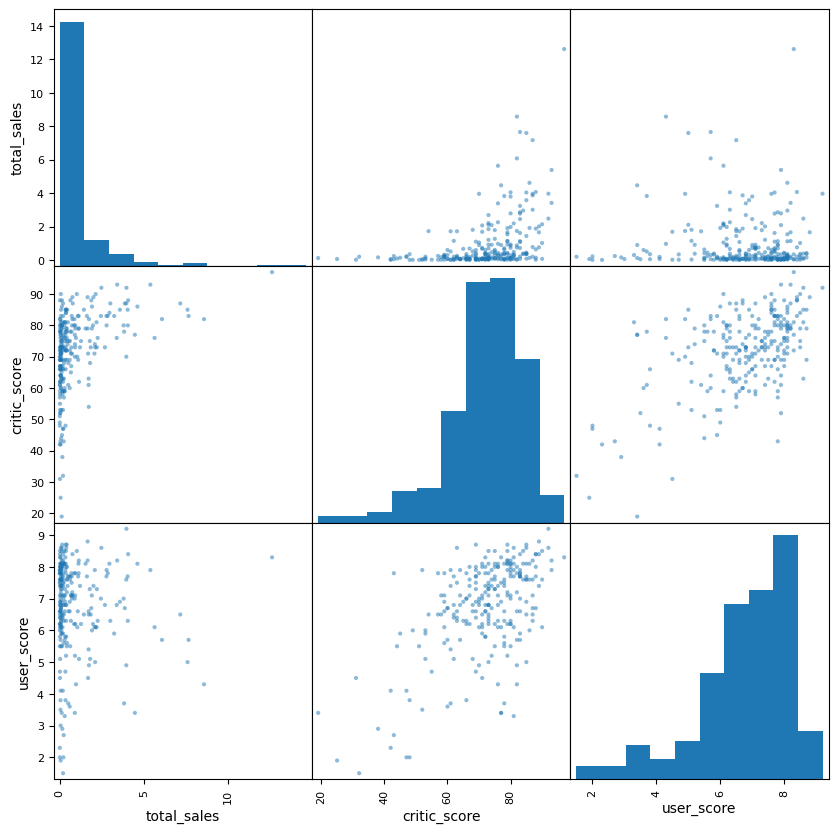

In [29]:
# построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(PS4_ratings, figsize=(10, 10))
plt.show()

**Промежуточные выводы:** \
Мы посмотрели, как влияют на продажи игр отзывы пользователей и критиков для одной популярной платформы и можем сделать следующие выводы:\
. на продажи влияют отзовы критиков;\
. на продажи не влияют отзовы пользователей.

**3.6. Соотнесите выводы с продажами игр на других платформах**

In [30]:
# на 2016 г. потенциально прибыльной платформой является также XOne, X360 

# сохраним в отдельную переменную данные по XOne, X360
X360_ratings = (games
       .query('platform =="X360"')
       .loc[:,['total_sales', 'critic_score', 'user_score']])


XOne_ratings = (games
       .query('platform =="XOne"')
       .loc[:,['total_sales', 'critic_score', 'user_score']])


In [31]:
# посчитаем корреляцию между отзывами и продажами
print('Корреляция между отзывами и продажами для X360:')
print()
print(X360_ratings.corr())

Корреляция между отзывами и продажами для X360:

              total_sales  critic_score  user_score
total_sales      1.000000      0.392866    0.114187
critic_score     0.392866      1.000000    0.625020
user_score       0.114187      0.625020    1.000000


In [32]:
# посчитаем корреляцию между отзывами и продажами
print('Корреляция между отзывами и продажами для XOne:')
print()
print(XOne_ratings.corr())

Корреляция между отзывами и продажами для XOne:

              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000


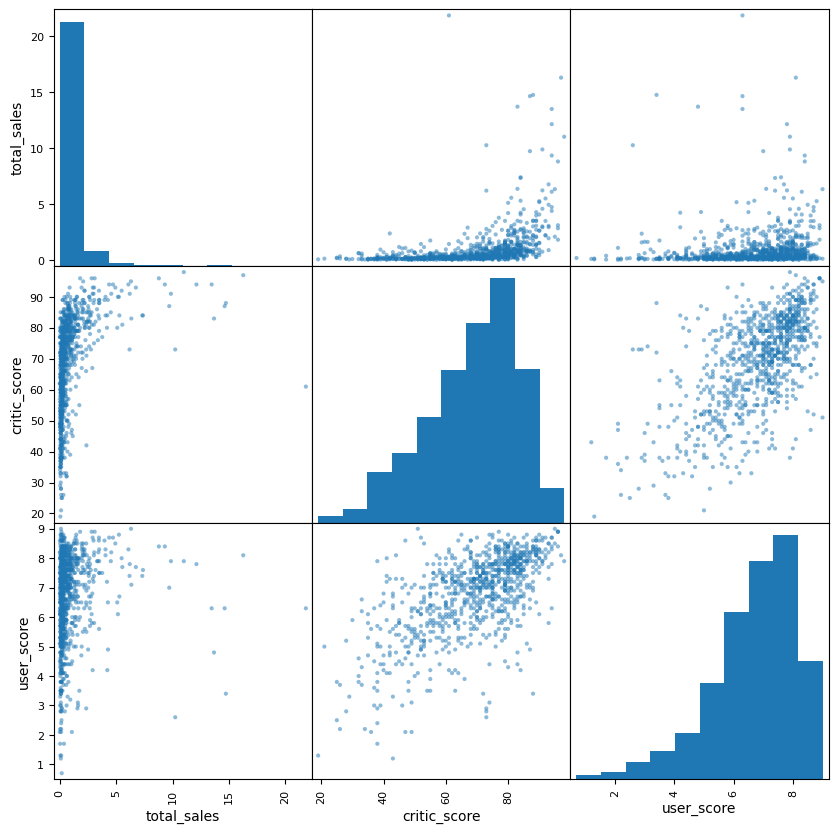

In [33]:
# построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(X360_ratings, figsize=(10, 10))
plt.show()

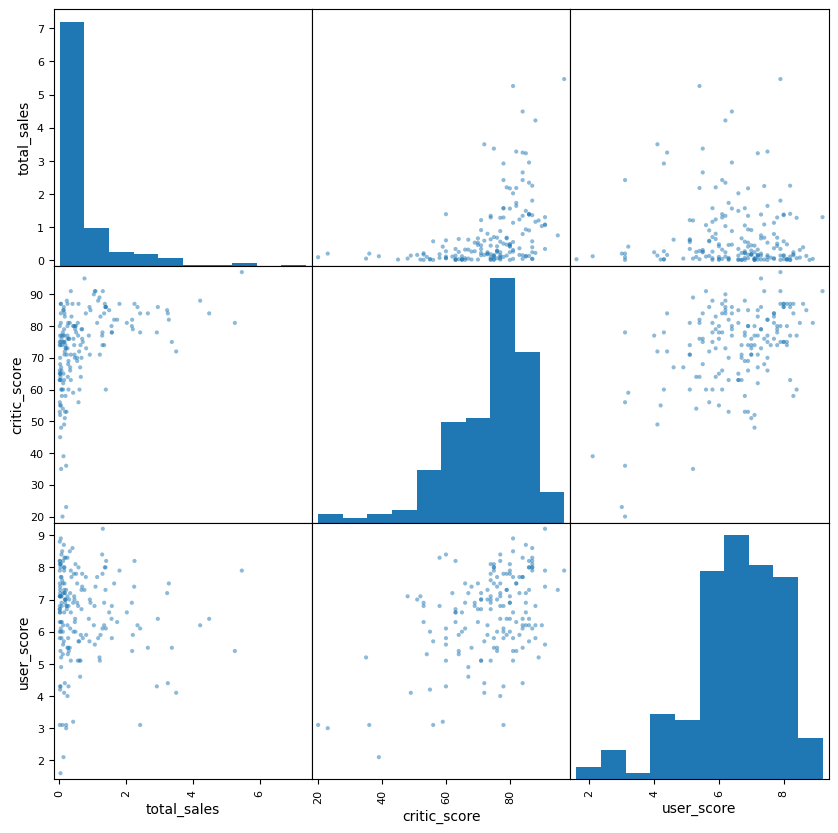

In [34]:
# построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(XOne_ratings, figsize=(10, 10))
plt.show()

**Промежуточные выводы:** \
На примере трех самых популярных платформ на 2016 можно сделать вывод о том, критики в большей степени влияют на продажи (т.е. они могут повлиять на успех игры и соответственно, на ее продажи), в отличии от пользователей, которые не влияют или влияют в малой степени.

**3.7. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [35]:
# создадим сводную таблицу с данными по жанрам и их продажами за весь период существования
genre_pivot_table = (games
                     .query('year_of_release == 2016')
                     .pivot_table(index='genre', values='total_sales', aggfunc='median')
                     .sort_values(by='total_sales', ascending=False))

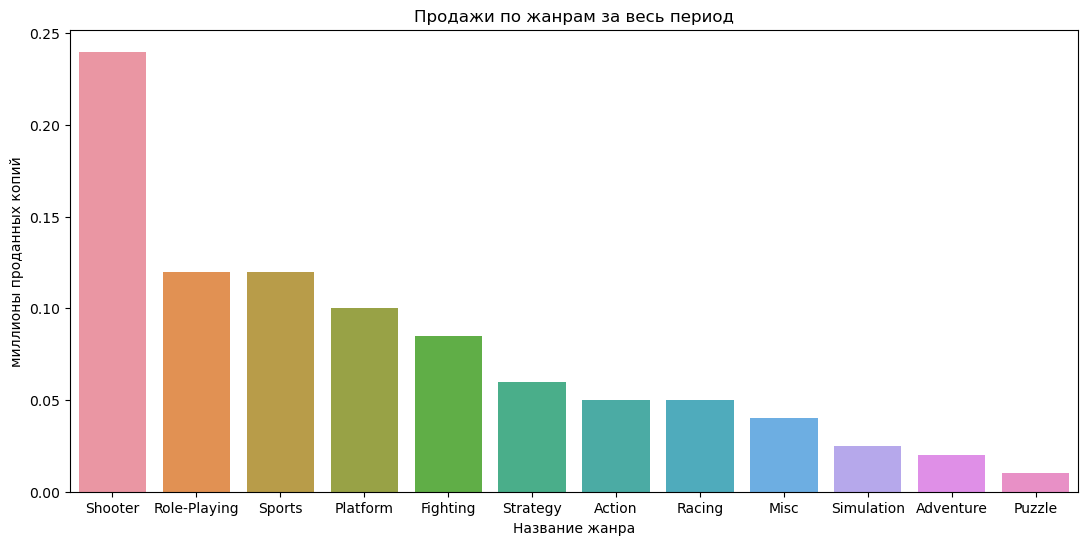

In [36]:
# построим столбиковую диаграмму
plt.figure(figsize=(13,6))
sns.barplot(x=genre_pivot_table.index, y=genre_pivot_table['total_sales'])
plt.title("Продажи по жанрам за весь период")
plt.xlabel("Название жанра")
plt.ylabel("миллионы проданных копий")
plt.show()

**Промежуточные выводы:** \
Мы можем смело утверждать что есть жанры игр с высокими и низкими продажами. Самые прибыльные жанры - это шутеры(Shooter), ролевые (Role-Playing) и спортивные игры (Sports). Эти виды жанров самые захватывающие и динамичные, для всех возрастных категорий населения в этих жанрах найдется игра по душе.

#### Шаг 4. Составим портрет пользователя каждого региона

**4.1. Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).
Опишем различия в долях продаж.**

In [37]:
# выделим данные за 2016 г. в отдельную переменную
games_2016 = games.query('year_of_release == 2016')

In [38]:
# выведем сводную таблицу - топ-5 популярных платформ для региона NA в 2016г.
games_2016_na = (games_2016
                 .pivot_table(index=['platform'], values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False)
            
                 .head())

display(games_2016_na)

,na_sales
platform,
PS4,21.49
XOne,14.27
3DS,4.14
WiiU,2.10
PC,1.36


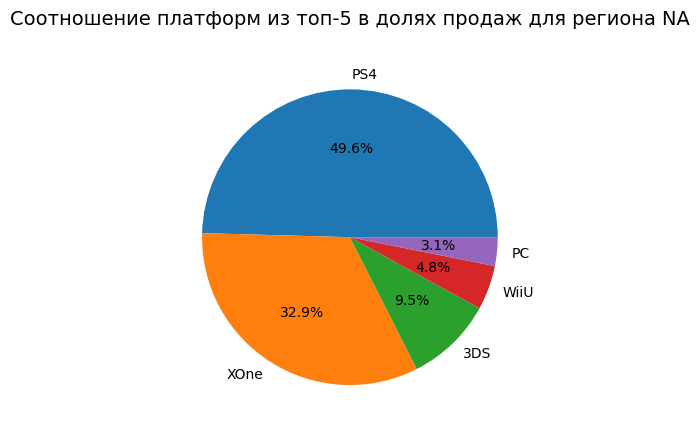

In [39]:
# соотношение платформ в долях продаж для региона NA
games_2016_na['na_sales'].plot(kind='pie', autopct='%1.1f%%', y='platform')
plt.title("Соотношение платформ из топ-5 в долях продаж для региона NA", fontsize=14, pad=20)
plt.ylabel("")
plt.show()

In [40]:
# выведем сводную таблицу - топ-5 популярных платформ для региона EU в 2016г.
games_2016_eu = (games_2016
                 .pivot_table(index=['platform'], values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False)
                 .reset_index()
                 .head())

display(games_2016_eu)

,platform,eu_sales
0,PS4,31.78
1,XOne,9.63
2,PC,3.53
3,3DS,2.33
4,WiiU,1.48


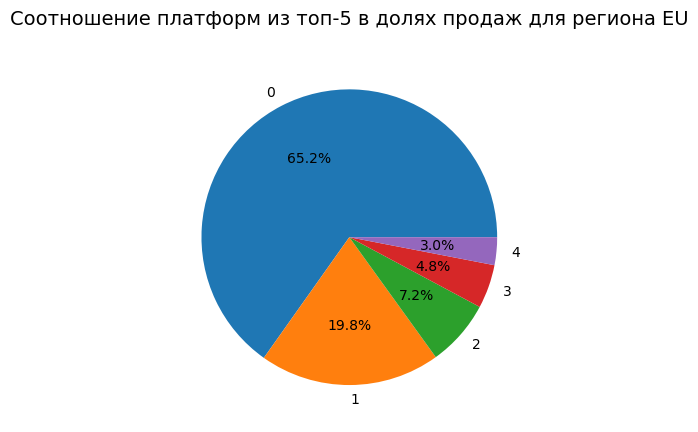

In [41]:
# соотношение платформ в долях продаж для региона EU
games_2016_eu['eu_sales'].plot(kind='pie', autopct='%1.1f%%')
plt.title("Соотношение платформ из топ-5 в долях продаж для региона EU", fontsize=14, pad=20)
plt.ylabel("")
plt.show()

In [42]:
# выведем сводную таблицу - топ-5 популярных платформ для региона JP в 2016г.
games_2016_jp = (games_2016
                 .pivot_table(index=['platform'], values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)
                 .reset_index()
                 .head())

display(games_2016_jp)

,platform,jp_sales
0,3DS,8.03
1,PS4,5.74
2,PSV,3.56
3,PS3,1.30
4,WiiU,0.67


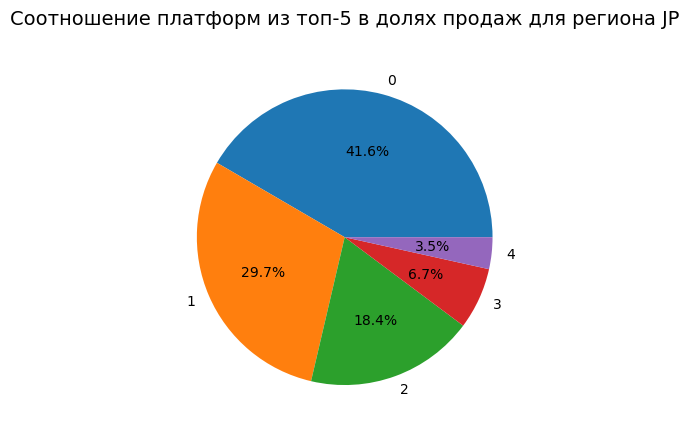

In [43]:
# соотношение платформ в долях продаж для региона JP
games_2016_jp['jp_sales'].plot(kind='pie', autopct='%1.1f%%')
plt.title("Соотношение платформ из топ-5 в долях продаж для региона JP", fontsize=14, pad=20)
plt.ylabel("")
plt.show()

**Промежуточные выводы:** \
Мы определили на 2016г. самые популярные платформы для разных регионов:\
. для NA - это PS4, XOne, 3DS, WiiU, PC;\
. для EU - это PS4, XOne, PC, 3DS, WiiU;\
. для JP - это 3DS, PS4, PSV, PS3, WiiU.\
Видно, что американские и европейские пользователи отдают предпочтения одним и тем же платформам, в отличии от японских пользователей.

**4.2. Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.**

In [44]:
# выведем сводную таблицу - топ-5 популярных жанров для региона NA в 2016г.
games_2016_na = (games_2016
                 .pivot_table(index=['genre'], values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False)
                 .reset_index()
                 .head())

display(games_2016_na)

,genre,na_sales
0,Shooter,16.24
1,Action,9.29
2,Sports,7.54
3,Role-Playing,5.89
4,Fighting,1.84


In [45]:
# выведем сводную таблицу - топ-5 популярных жанров для региона EU в 2016г.
games_2016_eu = (games_2016
                 .pivot_table(index=['genre'], values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False)
                 .reset_index()
                 .head())

display(games_2016_eu)

,genre,eu_sales
0,Shooter,15.90
1,Sports,12.01
2,Action,10.68
3,Role-Playing,4.28
4,Racing,1.77


In [46]:
# выведем сводную таблицу - топ-5 популярных жанров для региона JP в 2016г.
games_2016_jp = (games_2016
                 .pivot_table(index=['genre'], values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)
                 .reset_index()
                 .head())

display(games_2016_jp)

,genre,jp_sales
0,Action,7.07
1,Role-Playing,6.61
2,Adventure,1.18
3,Shooter,1.06
4,Misc,1.04


**Промежуточные выводы:** \
Мы определили на 2016г. самые популярные жанры для разных регионов:\
. для NA - это Shooter, Action, Sports, Role-Playing, Fighting;\
. для EU - это Shooter, Sports, Action, Role-Playing, Racing;\
. для JP - это Action, Role-Playing, Adventure, Shooter, Misc.\
На лицо отличие в разнице менталитетов Запапдной и Восточной культуры. Америнским и европейским пользователям (EU, NA) по нраву насилие, агрессия (популярные жанры Shooter, Sports, Action), а японские пользователи любят милые, хорошенькие и красивые игры со смыслом (популярные жанры Action, Role-Playing, Adventure).

**4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [47]:
games_2016_na = (games_2016
                 .pivot_table(index=['rating'], values='na_sales', aggfunc='sum')
                 .sort_values(by='na_sales', ascending=False)
                 .reset_index()
                 .head())
games_2016_eu = (games_2016
                 .pivot_table(index=['rating'], values='eu_sales', aggfunc='sum')
                 .sort_values(by='eu_sales', ascending=False)
                 .reset_index()
                 .head())
games_2016_jp = (games_2016
                 .pivot_table(index=['rating'], values='jp_sales', aggfunc='sum')
                 .sort_values(by='jp_sales', ascending=False)
                 .reset_index()
                 .head())

In [48]:
display(games_2016_na, games_2016_eu, games_2016_jp)

,rating,na_sales
0,M,15.67
1,T,8.95
2,unrated,8.53
3,E,7.97
4,E10+,3.81


,rating,eu_sales
0,M,16.54
1,E,13.61
2,T,9.79
3,unrated,7.47
4,E10+,3.81


,rating,jp_sales
0,unrated,14.32
1,T,2.27
2,M,1.20
3,E,1.07
4,E10+,0.45


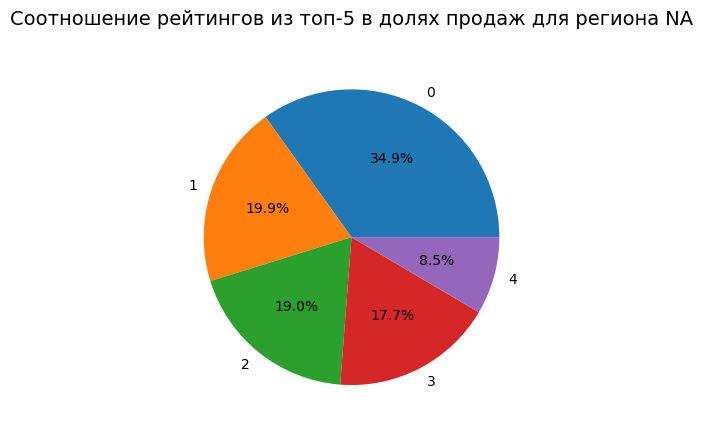

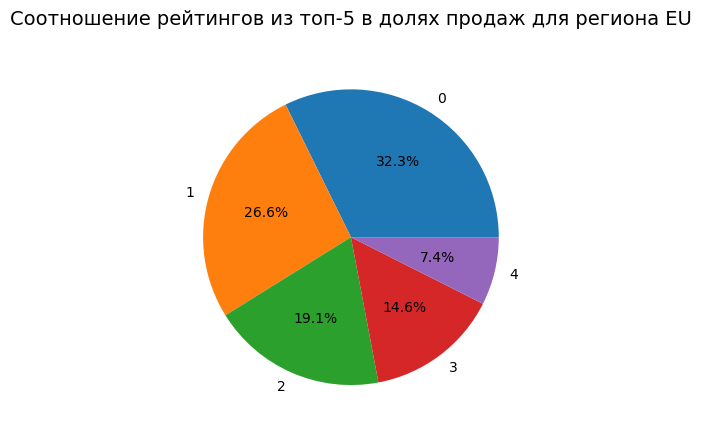

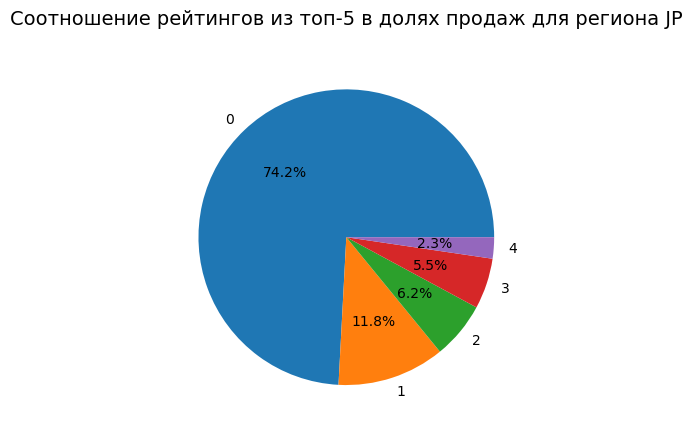

In [49]:
games_2016_na['na_sales'].plot(kind='pie', autopct='%1.1f%%')
plt.title("Соотношение рейтингов из топ-5 в долях продаж для региона NA", fontsize=14, pad=20)
plt.ylabel("")
plt.show()

games_2016_eu['eu_sales'].plot(kind='pie', autopct='%1.1f%%')
plt.title("Соотношение рейтингов из топ-5 в долях продаж для региона EU", fontsize=14, pad=20)
plt.ylabel("")
plt.show()

games_2016_jp['jp_sales'].plot(kind='pie', autopct='%1.1f%%')
plt.title("Соотношение рейтингов из топ-5 в долях продаж для региона JP", fontsize=14, pad=20)
plt.ylabel("")
plt.show()

**Промежуточные итоги:** \
В большенстве случаев, американские и европейские пользователи (NA, EU) опираются  на рейтинг ESRB, покупая игры, а вот японские пользователи, покупая игры, не опираются на рейтинги (тут явно больше сумарные продажи у игр без рейтинга).

#### Шаг 5. Проверим гипотезы

**5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Гипотеза H1: Cредние пользовательские рейтинги платформ Xbox One и PC разные. 

In [50]:
# сохраним в переменные два набора данных - пользовательские рейтинги платформ Xbox One и PC
user_score_XOne = games[(games['platform']=='XOne') & (games['year_of_release'] == 2016)]['user_score']
user_score_PC = games[(games['platform']=='PC') & (games['year_of_release'] == 2016)]['user_score']

In [51]:
# задаем уровень статистической значимости
alpha = 0.05

# проведем тест и посчитаем p-значение
results = st.ttest_ind(user_score_XOne.dropna(), user_score_PC.dropna(), equal_var=False)

# выведем на экран полученное p-значение
print('p-значение:', results.pvalue)

# сравним p-значение с заданным уровнем значимости alpha
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые")

p-значение: 0.3516273078893254
Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые


In [52]:
# выведем средние пользовательсикий рейтинг для каждой платформы (дабы убедиться)
print('Средний пользовательский рейтинги платформы Xbox One =', user_score_XOne.mean().round(2)) 
print('Средний пользовательский рейтинги платформы PC =', user_score_PC.mean().round(2)) 

Средний пользовательский рейтинги платформы Xbox One = 6.6
Средний пользовательский рейтинги платформы PC = 6.3


**5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

Гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. 

Гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [53]:
# сохраним в переменные два набора данных - пользовательские рейтинги жанров Action и Sports
user_score_Action = games[(games['genre']=='Action') & (games['year_of_release'] == 2016)]['user_score']
user_score_Sports = games[(games['genre']=='Sports') & (games['year_of_release'] == 2016)]['user_score']

In [54]:
# задаем уровень статистической значимости
alpha = 0.05

# проведем тест и посчитаем p-значение
results = st.ttest_ind(user_score_Action.dropna(), user_score_Sports.dropna(), equal_var=False)

# выведем на экран полученное p-значение
print('p-значение:', results.pvalue)

# сравним p-значение с заданным уровнем значимости alpha
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги жанров Action и Sports одинаковые")

p-значение: 0.002025023028063322
Отвергаем нулевую гипотезу, рейтинги жанров Action и Sports разные


In [55]:
# выведем средние пользовательсикие рейтинги жанров Action и Sports
print('Средний пользовательский рейтинги платформы Xbox One =', user_score_Action.mean().round(2)) 
print('Средний пользовательский рейтинги платформы PC =', user_score_Sports.mean().round(2)) 

Средний пользовательский рейтинги платформы Xbox One = 6.64
Средний пользовательский рейтинги платформы PC = 5.43


#### Шаг 6. Напишем общий вывод

Мы провели работу с данными Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

На этапе предобработки данных мы:\
    . отредактировали названия столбцов в таблице с данными;\
    . отбросили часть данных таблицы, в которых были пропуски;\
    . обработали пропущенные значения в некоторых столбцах таблицы с данными;\
    . преобразовали тип данных части столбцов табицы с данными на более удобные типы;\
    . добавили еще один "признак" в таблицу с данными - посчитали для каждой игры суммарные продажи во всех регионах.
    
На этапе исследовательского анализа данных мы строили графики, определяли и интерпретировали взаимосвязи данных, а именно:\
    . посмотрели сколько игр выпускалось в разные годы. И тем самым выяснили, что для анализа не нужны данные за весь период;\
    . посмотрели, как менялись продажи по платформам. Определили характерный срок в пару лет, за который появляются новые и исчезают тарые платформы. Определили платформы с наибольшими суммарными продажами и на основании этих даных определили среднюю продолжительность существования платформ (в среднем 10 лет) и временной пик их популярности (4-6 лет) (т.е. период когда платформы можно считать популярными и от продажи их игр поступает максимальная прибыль и продажи у которых растут до этого срока могут считаться перспективными);\
     . определили актульный период (пару лет) для построения прогноза на 2017. Определили какие именно платформы являются потенциально прибыльными (PS4,XOne и 3DS), какие еще будут актуальны в будущем (PS3, WiiU и PC) и все оставшиеся платформы давно упали в продажах и ждать роста продаж их игр в 2017 году не стоит;\
     . убедились в том, что не все платформы выпускают игры приносящие большие прибыли на текукщий период. Но есть явные лидеры (это PS3, PS4, Х360 и XOne). У этих платформ более популярные и продаваемые игры, чем у остальных и приносящие больше прибыли;\
     . на примере трех самых популярных платформ на 2016 можно сделать вывод о том, мнение критиков в большей степени влияют на продажи (т.е. они могут повлиять на успех игры и соответственно, на ее продажи), в отличии от мнения пользователей, которые не влияют или влияют в малой степени;\
     . мы смело можем утверждать что есть жанры игр с высокими и низкими продажами. Самые прибыльные жанры - это шутеры(Shooter), ролевые (Role-Playing) и спортивные игры (Sports). Эти виды жанров самые захватывающие и динамичные, для всех возрастных категорий населения в этих жанрах найдется игра по душе;\
     . составили портрет пользователя каждого региона, т.е. определили на 2016г. самые популярные платформы для разных регионов:\
         - для NA - это PS4, XOne, 3DS, WiiU, PC;\
         - для EU - это PS4, XOne, PC, 3DS, WiiU;\
         - для JP - это 3DS, PS4, PSV, PS3, WiiU.\
Видно, что американские и европейские пользователи отдают предпочтения одним и тем же платформам, в отличии от японских пользователей.\
и определили на 2016г. самые популярные жанры для разных регионов:\
        - для NA - это Shooter, Action, Sports, Role-Playing, Fighting;\
        - для EU - это Shooter, Sports, Action, Role-Playing, Racing;\
        - для JP - это Action, Role-Playing, Adventure, Shooter, Misc.\
        
        
На лицо отличие в разнице менталитетов Запапдной и Восточной культуры. Америнским и европейским пользователям (EU, NA) по нраву насилие, агрессия (популярные жанры Shooter, Sports, Action), а японские пользователи любят милые, хорошенькие и красивые игры со смыслом (популярные жанры Action, Role-Playing, Adventure).\    


Обратили внимание на то, что в большенстве случаев, американские и европейские пользователи (NA, EU) опираются на рейтинг ESRB, покупая игры, а вот японские пользователи, покупая игры, не опираются на рейтинги (тут явно больше сумарные продажи у игр без рейтинга).\


Проверили ряд гипотез и выяснили, что на актуальный 2016 г. средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\


Выявили определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Закономерность следующая: max прибыль от продаж принесут игры для платформы PS4 жанра Shooter с рейтингом М ("от 17 и выше").